### Importing Neccessary Libraries ###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Loading Churn's Dataset ###

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Cleaning ###

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Checking for total number of null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Checking for total number of duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Drop customerID as it's unique
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

### Exploratory Data Analysis ###

In [ ]:
# Use a Seaborn palette
colors = sns.color_palette("pastel")[0:3]

In [ ]:
#Distribution of Churn
counts = df["Churn"].value_counts()

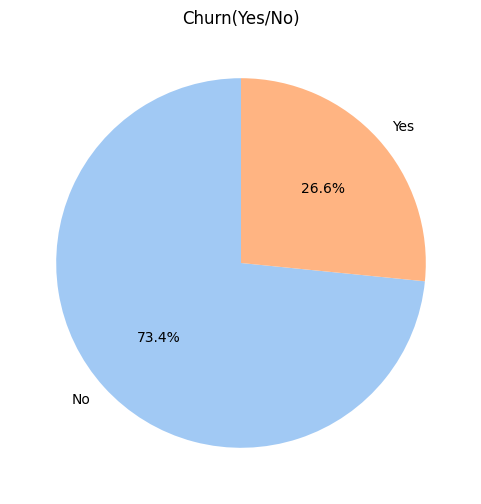

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Churn(Yes/No)')
plt.show()

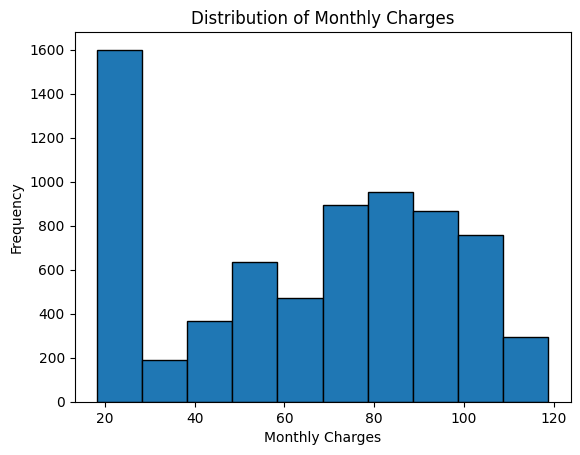

In [ ]:
# Histogram of Monthly Charges
plt.hist(df["MonthlyCharges"], bins=10, edgecolor="black")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Correlation HeatMap
numeric_columns_data = df.select_dtypes(include = ["number"])

In [ ]:
numeric_columns_data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


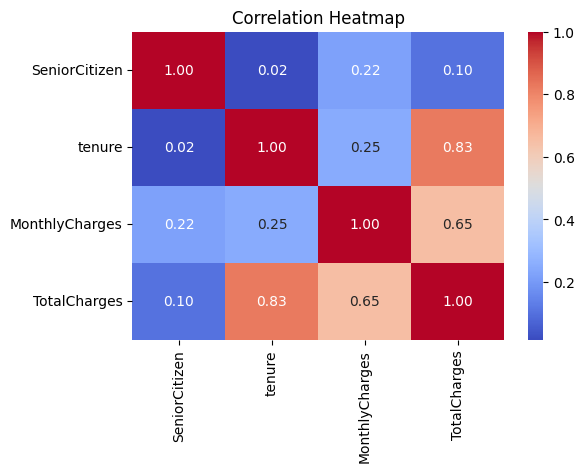

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_columns_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,61.307408
Yes,74.441332


In [ ]:
df.groupby(["Churn","gender"])["MonthlyCharges"].mean()

Churn  gender
No     Female    61.674941
       Male      60.950401
Yes    Female    74.812087
       Male      74.066989
Name: MonthlyCharges, dtype: float64

In [ ]:
df.groupby("Churn")["tenure"].mean()

,tenure
Churn,
No,37.650010
Yes,17.979133


In [ ]:
df.groupby("Churn")["SeniorCitizen"].mean()

,SeniorCitizen
Churn,
No,0.128995
Yes,0.254682


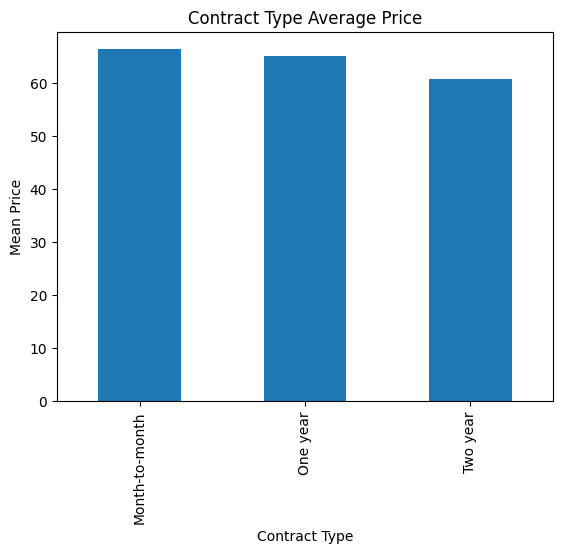

In [ ]:
df.groupby("Contract")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Contract Type Average Price")
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.show()

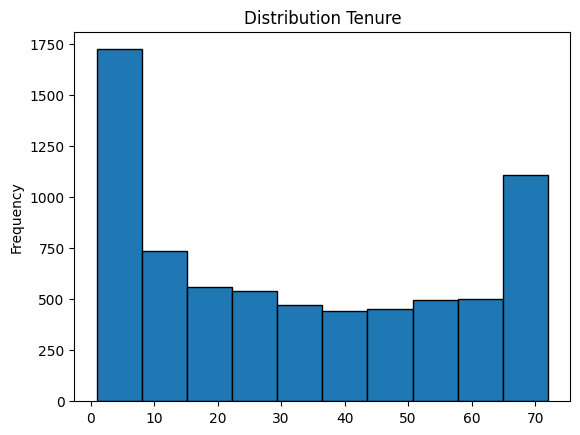

In [ ]:
plt.hist(df["tenure"], edgecolor="black")
plt.title("Distribution Tenure")
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

### Data Preprocessing ###

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
# Encoding Categorical variables
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# Features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training & Evaluation ###

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test,y_pred))
    print("Accuracy: ",accuracy_score(y_test,y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy:  0.7853589196872779

K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407

Accuracy:  0.7405828002842928

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.65      0.46      0.54       374

    accuracy                 

### Feature Importance ###

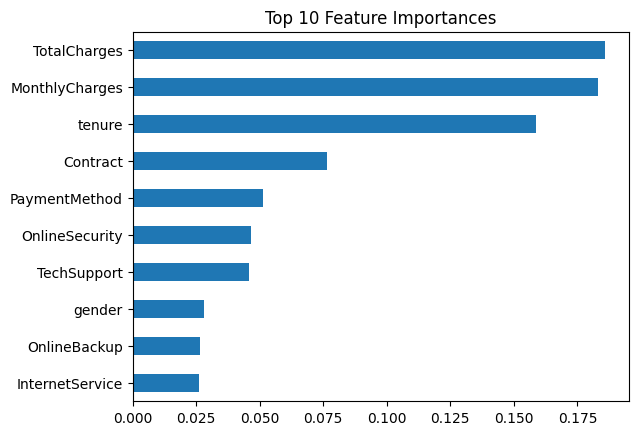

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

### Optimizing Models ###

In [ ]:
# Dictionary to store results
results = {}

In [ ]:
# Define parameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5]
    }
}

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
# Loop through models
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    # Evaluate on test
    y_pred = grid.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        "best_params": grid.best_params_,
        "cv_score": grid.best_score_,
        "test_accuracy": test_acc
    }

Optimizing Logistic Regression...
Optimizing K-Nearest Neighbors...
Optimizing Support Vector Machine...
Optimizing Decision Tree...
Optimizing Random Forest...
Optimizing Gradient Boosting...


In [ ]:
results_list = []
for model, res in results.items():
    results_list.append({
        "Model": model,
        "Best Params": res["best_params"],
        "CV Score": round(res["cv_score"], 4),
        "Test Accuracy": round(res["test_accuracy"], 4)
    })

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)

# Comparison Table Sorted
results_df

,Model,Best Params,CV Score,Test Accuracy
0,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.8046,0.7953
1,Support Vector Machine,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.7968,0.7918
2,Random Forest,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.8041,0.7896
3,Decision Tree,"{'max_depth': 5, 'min_samples_split': 5}",0.7899,0.7882
4,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.8057,0.7868
5,K-Nearest Neighbors,"{'n_neighbors': 9, 'weights': 'uniform'}",0.7701,0.7548


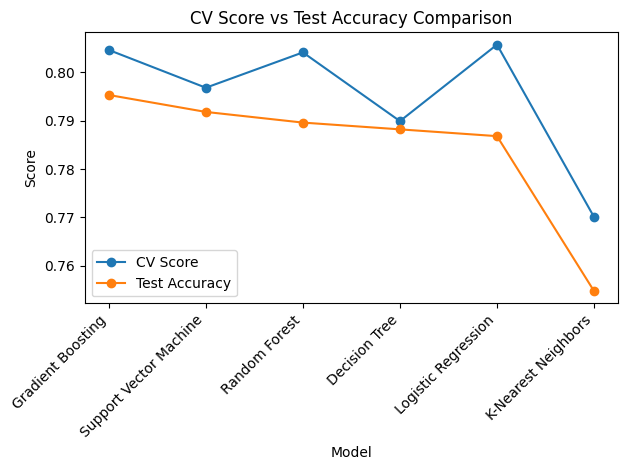

In [ ]:
plt.figure()
plt.plot(results_df["Model"], results_df["CV Score"], marker='o', label="CV Score")
plt.plot(results_df["Model"], results_df["Test Accuracy"], marker='o', label="Test Accuracy")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("CV Score vs Test Accuracy Comparison")
plt.legend()
plt.tight_layout()
plt.show()
